In [2]:
import pandas as pd
df = pd.read_pickle('trains.pkl')

In [3]:
df.describe()

,duration
count,1783.000000
mean,-2.980931
std,2257.811238
min,-39600.000000
25%,116.000000
50%,161.000000
75%,222.000000
max,10280.000000


In [4]:
original = df.copy()

In [5]:
# Remove times when no data collected.
df = df[df['duration'] >= 0]
df['day_of_week'] = df['start'].dt.dayofweek
df['date'] = df['start'].dt.date

In [6]:
df.head()

,start,end,duration,day_of_week,date
0,2017-10-10 00:10:33,2017-10-10 00:12:58,145,1,2017-10-10
1,2017-10-10 00:25:49,2017-10-10 00:27:25,96,1,2017-10-10
2,2017-10-10 00:53:04,2017-10-10 00:57:40,276,1,2017-10-10
3,2017-10-10 01:07:53,2017-10-10 01:09:02,69,1,2017-10-10
4,2017-10-10 01:23:22,2017-10-10 01:29:43,381,1,2017-10-10


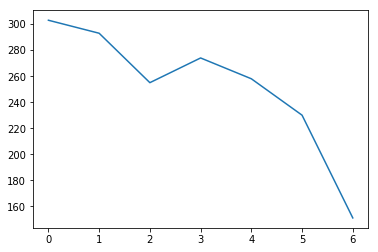

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

count = df.groupby(df['day_of_week']).count()
count.head()
plt.plot(count['start'])

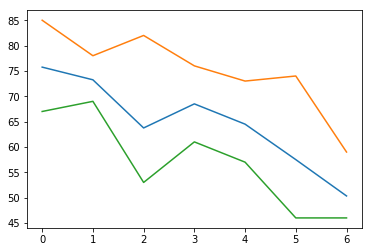

In [8]:
daily = df.set_index('start').groupby(pd.Grouper(freq='D')).count()
daily['day_of_week'] = daily.index.dayofweek
dowly = daily.groupby('day_of_week')
plt.plot(dowly.mean()['end'])
plt.plot(dowly.max()['end'])
plt.plot(dowly.min()['end'])

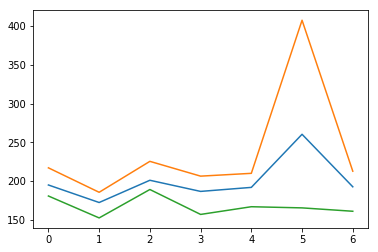

In [9]:
# Check for average duration by day
daily = df.set_index('start').groupby(pd.Grouper(freq='D')).mean()
daily['day_of_week'] = daily.index.dayofweek
dowly = daily.groupby('day_of_week')
plt.plot(dowly.mean()['duration'])
plt.plot(dowly.max()['duration'])
plt.plot(dowly.min()['duration'])